<a href="https://colab.research.google.com/github/yangyiqiu123/Machine-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境


pandas==1.3.3

numpy==1.21.6

tensorflow==2.10.0

keras==2.10.0

opencv-python==4.4.0.46

matplotlib==3.2.2

tqdm==4.63.1:

# 更改路徑

In [4]:
%cd /content/drive/MyDrive/ai/HW2

/content/drive/MyDrive/ai/HW2


# Cifar_build_model_CNN.py

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test data: images: (10000, 32, 32, 3)  labels: (10000, 1)
(10000, 10)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_32 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_33 (Dropout)        (None, 16, 16, 64)        0         
                                                         

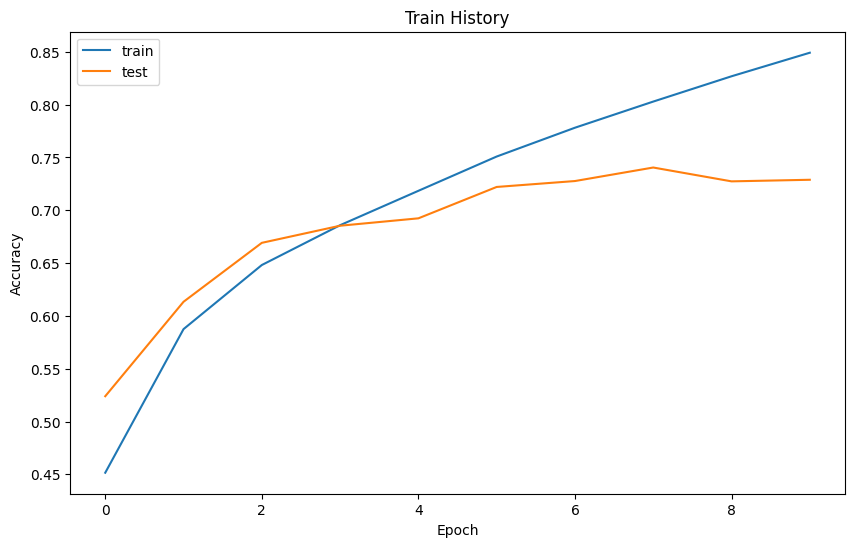

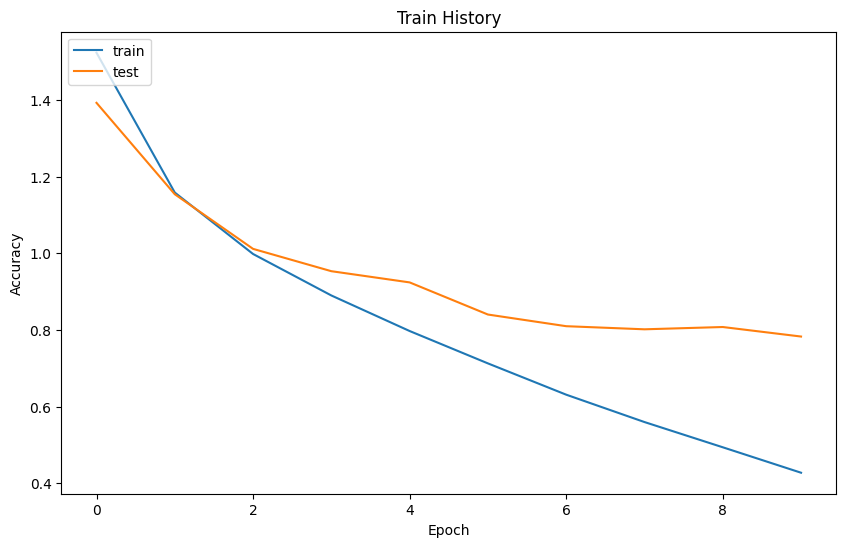

313/313 [==============================] - 2s 5ms/step
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
預測結果: cat
預測結果: ship
預測結果: ship
預測結果: airplane
預測結果: frog
預測結果: frog
預測結果: automobile
預測結果: frog
預測結果: cat
預測結果: automobile


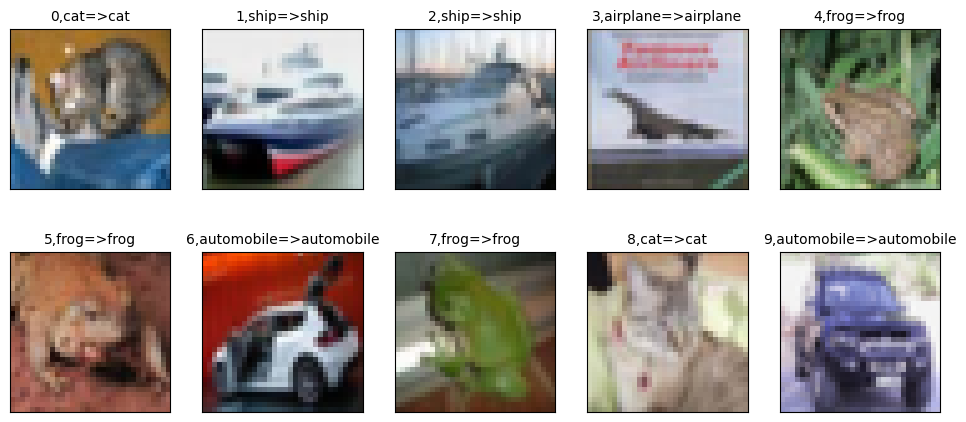

313/313 [==============================] - 1s 2ms/step
label: cat predict: cat


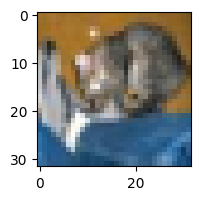

airplane Probability:0.001034037
automobile Probability:0.001814050
bird Probability:0.006756414
cat Probability:0.777011395
deer Probability:0.004487349
dog Probability:0.180722073
frog Probability:0.016963968
horse Probability:0.000701865
ship Probability:0.007219799
truck Probability:0.003288967
label: airplane predict: airplane


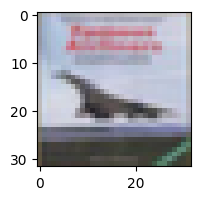

airplane Probability:0.730467796
automobile Probability:0.018893691
bird Probability:0.078266732
cat Probability:0.008495485
deer Probability:0.007600727
dog Probability:0.000051211
frog Probability:0.000435723
horse Probability:0.000671062
ship Probability:0.153158978
truck Probability:0.001958625
Saved model to disk


In [44]:
import tensorflow
from tensorflow import keras

from keras.datasets import cifar10
import numpy as np

# Step 1. 資料準備

# 載入 cifar10 資料集，分成訓練與測試兩部分
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 輸出訓練與測試資料的 shape
# train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
# test data: images: (10000, 32, 32, 3)  labels: (10000, 1)
print("train data:",'images:',x_train.shape," labels:",y_train.shape) 
print("test data:",'images:',x_test.shape," labels:",y_test.shape) 

# 將資料轉換為 0-1 的範圍內
x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0

# 將標籤進行 one-hot encoding
y_train_OneHot = tensorflow.keras.utils.to_categorical(y_train)
y_test_OneHot = tensorflow.keras.utils.to_categorical(y_test)

# 輸出 one-hot encoding 後標籤的 shape
# (10000, 10)
print(y_test_OneHot.shape)


# Step 2. 建立模型

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

# 建立 Sequential 模型
model = Sequential()

# 卷積層1與池化層1

# 新增卷積層，使用 32 個 3x3 的 filter，並使用 relu 作為激活函數，padding 設定為 same
# 第一層卷積層使用了32個3x3的卷積核，每個卷積核都是不同的
# 當 padding 設置為 'same' 時，會在輸入的四周添加足夠的零，以便卷積核的每一個點都能至少與輸入的一個點進行卷積，使得輸出形狀與輸入形狀相同
# padding 設置為 'valid'，則不會添加任何額外像素，這可能會導致輸出形狀比輸入形狀小
# 在建立 Keras 模型時，只有第一層需要指定輸入形狀，後續的層會自動推斷輸入形狀
# 第一層的輸入形狀為 (32, 32, 3)，所以第二層的輸入形狀就是 (32, 32, 32)，其中 32 是指這一層使用了 32 個 3x3 的卷積核(filters)產生的特徵圖(feature map)
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 input_shape=(32, 32, 3), 
                 activation='relu', 
                 padding='same'))

# 新增 Dropout 層，rate 設定為 0.25
model.add(Dropout(rate=0.25))

# 新增 MaxPooling 層，使用 2x2 的 filter
# 使用 2x2 的 filter，可以將特徵圖縮小一半的大小，以減少後續的計算量
model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層2與池化層2

# 新增卷積層，使用 64 個 3x3 的 filter，並使用 relu 作為激活函數，padding 設定為 same
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

# 新增 Dropout 層，rate 設定為 0.25
model.add(Dropout(0.25))

# 新增 MaxPooling 層，使用 2x2 的 filter
model.add(MaxPooling2D(pool_size=(2, 2)))


# Step 3. 建立神經網路(平坦層、隱藏層、輸出層)

# 新增 Flatten 層，將輸出轉換為一維陣列
model.add(Flatten())
# Dropout層可以隨機地將一定比例的神經元設為0
model.add(Dropout(rate=0.25))

# 加入一層有 1024 個神經元的全連接層，使用 ReLU 作為激活函數，這裡的 1024 可以根據需要調整
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

# 加入一個有 10 個神經元的輸出層，使用 softmax 作為激活函數，將輸出轉換為類別機率分布
model.add(Dense(10, activation='softmax'))

print(model.summary())


# 載入之前訓練的模型

try:
    model.load_weights("./cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")


# Step 4. 訓練模型
# 將模型設定好之後，使用compile方法來編譯模型，並設定訓練過程中使用的損失函數(loss)、優化器(optimizer)和評估指標(metrics)
# 優化器（Optimizer）是用於調整模型權重以最小化損失函數的算法
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])


# x_train_normalize：訓練集資料，經過正規化後的圖像像素值。
# y_train_OneHot：訓練集標籤，經過 One-Hot 編碼的類別標籤。
# validation_split：設定驗證集的比例，這裡設定為 0.2，即將 20% 的訓練數據用於驗證集。
# epochs：訓練的回合數，這裡設定為 10。
# batch_size：每一個 batch 的大小，這裡設定為 128。
# verbose：顯示訓練過程，設定為 1 會顯示進度條。
train_history=model.fit(x_train_normalize, y_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    # 設定圖片大小
    plt.figure(figsize=(10, 6))
    # 畫出訓練集準確度的變化曲線
    plt.plot(train_history.history[train_acc])
    # 畫出測試集準確度的變化曲線
    plt.plot(train_history.history[test_acc])
    # 設定圖片標題
    plt.title('Train History')
    # 設定圖片y軸標籤
    plt.ylabel('Accuracy')
    # 設定圖片x軸標籤
    plt.xlabel('Epoch')
    # 設定圖例
    plt.legend(['train', 'test'], loc='upper left')
    # 顯示圖片
    plt.show()

show_train_history('acc','val_acc')
show_train_history('loss','val_loss')


# Step 6. 評估模型準確率
# 計算模型在測試集上的損失0和精度1
scores = model.evaluate(x_test_normalize,  y_test_OneHot, verbose=1)
scores[1]


# 進行預測
# 將模型套用在測試資料集上，並對前10筆測試資料進行預測，結果存放在prediction變數中
prediction=model.predict(x_test_normalize)
prediction = prediction[:10]

# 查看預測結果

label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
			
print(label_dict)

for i in range(len(prediction)):
    # 返回在第 i 個預測向量中具有最大值的索引
    print("預測結果:", label_dict[np.argmax(prediction[i])])

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    
    # images: 要顯示的圖像
    # labels: 資料標籤
    # prediction: 模型預測的結果，若無預測結果，請給空串列 []
    # idx: 起始顯示的資料索引
    # num: 顯示的資料筆數，預設為 10 筆
    
    # 顯示圖像、標籤，以及模型預測的結果（若有預測結果）
    
    # 取得當前 figure
    # 取得當前 figure 是為了設定該 figure 的大小，可以使用 plt.gcf() 函數來取得當前的 figure，然後使用 fig.set_size_inches() 函數來設定其大小
    fig = plt.gcf()   

    fig.set_size_inches(12, 14)  # 設定 figure 的大小
    if num>25: num=25  # 限制顯示資料的筆數，最多顯示 25 筆
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)  # 設定子圖的位置
        ax.imshow(images[idx],cmap='binary')  # 顯示圖像
        
        title=str(i)+','+label_dict[labels[i][0]]  # 設定子圖標題，加上圖片編號與真實標籤
        if len(prediction)>0:  # 如果有預測結果
            title+='=>'+label_dict[np.argmax(prediction[i])]  # 加上預測結果
            
        ax.set_title(title,fontsize=10)  # 設定子圖標題
        ax.set_xticks([]);ax.set_yticks([])  # 隱藏子圖的刻度線        
        idx+=1  # 指向下一個資料
    plt.show()  # 顯示子圖

plot_images_labels_prediction(x_test,y_test, prediction,0,10)

# 查看預測機率

Predicted_Probability=model.predict(x_test_normalize)

def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    # y 為真實的標籤，prediction 為模型的預測，x_img 為圖像資料，Predicted_Probability 為預測機率
    # i 為要顯示的圖片編號
    print('label:',label_dict[y[i][0]], 'predict:',label_dict[np.argmax(prediction[i])])
    # 顯示圖片的真實標籤與模型預測的標籤
    # figsize 參數是用來設定畫布的大小，單位是英吋，這裡設定為 2x2 英吋
    plt.figure(figsize=(2,2))
    # imshow 函數則是用來顯示圖片
    # NumPy 中的 reshape 函數將一維向量轉換為三維的圖片格式 (32, 32, 3)
    plt.imshow(np.reshape(x_test[i],(32, 32,3)))
    plt.show()
    # 顯示圖片以及其對應的預測機率
    for j in range(10):
        print(label_dict[j]+ ' Probability:%1.9f'%(Predicted_Probability[i][j]))

show_Predicted_Probability(y_test,prediction, x_test,Predicted_Probability,0)
show_Predicted_Probability(y_test,prediction, x_test,Predicted_Probability,3)

# Step 8. Save Weight to h5 

model.save_weights("./cifarCnnModel.h5")
print("Saved model to disk")

# Cifar_load_model_CNN

success


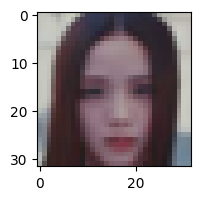

1/1 [==============================] - 0s 18ms/step
predict: dog
airplane Probability:0.000000006
automobile Probability:0.000000012
bird Probability:0.022472326
cat Probability:0.019980839
deer Probability:0.000006967
dog Probability:0.957011759
frog Probability:0.000104661
horse Probability:0.000420508
ship Probability:0.000000245
truck Probability:0.000002666


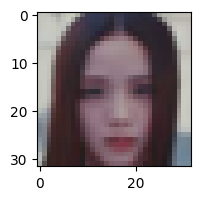

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

try:
    model.load_weights("./cifarCnnModel.h5")
    print("success")
except:
    print("error")

def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image,cmap='binary')
    plt.show()

def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(np.argmax(prediction[idx]))
        
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
# 讀取測試圖片
# img = np.array(Image.open('test.png'))
img = np.array(Image.open('b.png'))
# img = np.array(Image.open('110321005.jpg'))


# 顯示測試圖片
plot_image(img)

# 建立空的3D Numpy陣列，儲存圖片
data_test = np.empty((1,3,32,32),dtype="uint8")

# 將圖片的RGB通道分離後儲存
data_test[0,:,:,:] = [img[:,:,0],img[:,:,1],img[:,:,2]]

# 將資料轉換為神經網路所需的格式
data_test = data_test.transpose(0, 2, 3, 1)

# 將測試資料進行正規化
data_test_normalize = data_test.astype('float32') / 255.0

# 進行圖片分類預測
prediction = model.predict(data_test_normalize)

# 取出前10個預測結果
prediction = prediction[:10]

# 定義標籤字典
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
              5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

# 進行預測機率計算
Predicted_Probability = model.predict(data_test_normalize)

# 定義顯示預測結果與機率的函數
def show_Predicted_Probability(prediction, x_img, Predicted_Probability, i):
    # 顯示預測結果
    print('predict:',label_dict[np.argmax(prediction[i])])
    # 顯示測試圖片
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(data_test[i],(32, 32,3)))
    # 顯示每個類別的預測機率
    for j in range(10):
        print(label_dict[j]+ ' Probability:%1.9f'%(Predicted_Probability[i][j]))

# 顯示第一個測試圖片的預測結果與機率
show_Predicted_Probability(prediction, data_test, Predicted_Probability, 0)

# Cifar_build_model_CNN_img.py

In [ ]:
# coding: utf-8

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from data import load_data
import numpy as np
import random

np.random.seed(10)

# Step 1. 資料準備
# 載入資料
print("Loading data...")
(x_train,y_train),(x_test,y_test)=load_data()  # load_data() 函式的實現需要從其他地方引入
print("Data loaded")

# 將資料維度調整成模型所需的格式
x_train = x_train.transpose(0, 2, 3, 1)
x_test = x_test.transpose(0, 2, 3, 1)

# 將訓練集的圖片和標籤互相打亂，以增加隨機性
index_1 = [i for i in range(len(x_train))]
random.shuffle(index_1)
x_train = x_train[index_1]
y_train = y_train[index_1]

# 將測試集的圖片和標籤互相打亂，以增加隨機性
index_2 = [i for i in range(len(x_test))]
random.shuffle(index_2)
x_test = x_test[index_2]
y_test = y_test[index_2]

# 輸出資料集的形狀
print("train data:",'images:',x_train.shape," labels:",y_train.shape) 
print("test data:",'images:',x_test.shape," labels:",y_test.shape) 

# 將圖片數值做歸一化，將其轉換為 0~1 之間的浮點數
x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0

# 將標籤轉換為 one-hot 向量的形式，方便模型進行分類
y_train_OneHot = keras.utils.to_categorical(y_train)
y_test_OneHot = keras.utils.to_categorical(y_test)

# 輸出 one-hot 標籤的形狀
print(y_train_OneHot.shape)
print(y_test_OneHot.shape)

# Step 2. 建立模型

model = Sequential()

# 卷積層1與池化層1

model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層2與池化層2

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))


# Step 3. 建立神經網路(平坦層、隱藏層、輸出層)

model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))

print(model.summary())


# 載入之前訓練的模型

try:
    model.load_weights("./cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")


# Step 4. 訓練模型

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
train_history=model.fit(x_train_normalize, y_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=128, verbose=1)          

import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history('acc','val_acc')
show_train_history('loss','val_loss')


# Step 6. 評估模型準確率

scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=0)
print(scores[:10])


# 進行預測

prediction=model.predict(x_test_normalize)
prediction = prediction[:10]
#print(len(prediction))
# 查看預測結果

label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
			
print(label_dict)		

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i]]
        if len(prediction)>0:
            title+='=>'+label_dict[np.argmax(prediction[i])]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

plot_images_labels_prediction(x_test_normalize,y_test,prediction,0,10)

# 查看預測機率

Predicted_Probability=model.predict(x_test_normalize)

def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i]],
          'predict:',label_dict[np.argmax(prediction[i])])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+ ' Probability:%1.9f'%(Predicted_Probability[i][j]))

show_Predicted_Probability(y_test,prediction,x_test_normalize,Predicted_Probability,0)
show_Predicted_Probability(y_test,prediction,x_test_normalize,Predicted_Probability,3)

# Step 8. Save Weight to h5 

model.save_weights("./cifarCnnModel.h5")
print("Saved model to disk")

Loading data...


FileNotFoundError: ignored

# data

In [ ]:
#coding:utf-8

import os
from PIL import Image
import numpy as np

#彩色圖片輸入,將channel 1 改成 3，data[i,:,:,:] = [arr[:,:,0],arr[:,:,1],arr[:,:,2]]
def load_data():
	# 其中 49000 表示訓練圖像的數量，3 表示圖像通道數，32 表示圖像的高度和寬度
	data_train = np.empty((49000,3,32,32),dtype="uint8") # for train
	# 代表一維的數組
	label_train = np.empty((49000,),dtype="uint8")
	data_test = np.empty((1000,3,32,32),dtype="uint8") # for test
	label_test = np.empty((1000,),dtype="uint8")
	
	# 載入訓練資料

	# 讀取 trainImg 資料夾下的所有檔案
	imgs_1 = os.listdir("./trainImg")
 	# 計算訓練資料的總數量
	num_1 = len(imgs_1)
	for i in range(num_1):
		img_1 = Image.open("./trainImg/"+imgs_1[i])  # 打開圖像檔案
		arr_1 = np.array(img_1)  # 將圖像轉換成 numpy 數組
		# 這個數組的形狀為 (49000, 3, 32, 32)。其中第一個維度是樣本數，
		# 第二個維度是通道數（因為圖片是彩色的，所以有三個通道），第三、四個維度則是圖片的高度和寬度。
		# 所以 data_train[i,:,:,:] 就是用來存放第 i 張訓練圖片的 numpy 數組，形狀為 (3, 32, 32)。
		data_train[i,:,:,:] = [arr_1[:,:,0],arr_1[:,:,1],arr_1[:,:,2]]  # 存儲圖像數組
		label_train[i] = int(imgs_1[i].split('.')[0])  # 存儲圖像標籤
		
	# 載入測試資料
	imgs_2 = os.listdir("./testImg")  # 讀取 testImg 資料夾下的所有檔案
	num_2 = len(imgs_2)  # 計算測試資料的總數量
	for i in range(num_2):
		img_2 = Image.open("./testImg/"+imgs_2[i])  # 打開圖像檔案
		arr_2 = np.array(img_2)  # 將圖像轉換成 numpy 數組
		data_test[i,:,:,:] = [arr_2[:,:,0],arr_2[:,:,1],arr_2[:,:,2]]  # 存儲圖像數組
		label_test[i] = int(imgs_2[i].split('.')[0])  # 存儲圖像標籤

	return (data_train,label_train), (data_test,label_test)

